# EDA

See a comperhansive overview and details on this dataset [here](https://www.kaggle.com/ajay1735/hmeq-data).

In this stage of The Project, the data will be explored using commonly used methods in the folowing steps:

1. **Basic Data Exploration** - check what the data set comprises of in terms of:
    * Shape of the dataset
    * Data Types, missing values outliers
    * Inconsistencies (e.g. "Mr" vs "mr.") etc.
    * Visualizations
    * Etc.
2. **Reshaping Data** - changing the data:
    * Handeling duplications/invalid entries/outliers.
    * Data transformations.
    * Feature engineering.
    * Etc.
    
    
 
## Basic Data Preparation

before begining the analysis the data will be split to avoid data leakage.
first the data will split to inputes and targets, and then to the Train and Test sets, and then split the training data to the validation set.
The data is small so a cross validation is needed to be representative enough to the data's actual distribution and bias and prevent overfitting.

In [1]:
import pandas as pd
import cufflinks as cf; cf.go_offline()
df = pd.read_csv("Data/hmeq.csv")
df.shape

(5960, 13)

In [2]:
df.sample(3)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
4639,1,24400,119000.0,144400.0,DebtCon,Mgr,33.0,0.0,2.0,229.300000,7.0,36.0,NaN
2320,1,14000,46400.0,NaN,DebtCon,Other,18.0,0.0,1.0,145.066667,1.0,14.0,NaN
51,0,3100,NaN,70400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
from sklearn.model_selection import train_test_split
X = df.drop("BAD", axis = 1)
y = df["BAD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.25) # 25% of 80% is 20%
print(f"Train set: X_train size: {X_train2.shape}, X_train size: {y_train2.shape}")
print(f"Cross val set: X_train size: {X_val.shape}, X_train size: {y_val.shape}")
print(f"test set: X_train size: {X_test.shape}, X_train size: {y_test.shape}")

Train set: X_train size: (3576, 12), X_train size: (3576,)
Cross val set: X_train size: (1192, 12), X_train size: (1192,)
test set: X_train size: (1192, 12), X_train size: (1192,)


In [4]:
Train = X_train2.copy()
Train["BAD"] = y_train2
Train.sample(3)# display how the data looks after prep

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,BAD
3862,20200,45088.0,65211.0,DebtCon,Office,10.0,0.0,2.0,118.569670,1.0,22.0,43.454512,0
1705,12000,69796.0,93757.0,DebtCon,Office,16.0,0.0,1.0,91.432676,0.0,8.0,24.459384,0
4910,25900,201877.0,239546.0,HomeImp,Other,6.0,0.0,0.0,134.853243,0.0,42.0,40.398114,0


In [5]:
#cv set
Cross_val = X_val.copy()
Cross_val["BAD"] = y_val

#test set
Test = X_test.copy()
Test["BAD"] = y_test

print(f"Cross val set shape: {Cross_val.shape}, Test set shape: {Test.shape}")

Cross val set shape: (1192, 13), Test set shape: (1192, 13)


Now the data is split to 3 sets:

* **Training:** 60%

* **Cross validation:** 20%

* **Testing:** 20%

now the main focus will be on the train set

## Basic Data Exploration

Here we will try to better understand the data:

In [6]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3576 entries, 4079 to 4506
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LOAN     3576 non-null   int64  
 1   MORTDUE  3247 non-null   float64
 2   VALUE    3501 non-null   float64
 3   REASON   3423 non-null   object 
 4   JOB      3406 non-null   object 
 5   YOJ      3263 non-null   float64
 6   DEROG    3158 non-null   float64
 7   DELINQ   3231 non-null   float64
 8   CLAGE    3388 non-null   float64
 9   NINQ     3264 non-null   float64
 10  CLNO     3440 non-null   float64
 11  DEBTINC  2834 non-null   float64
 12  BAD      3576 non-null   int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 391.1+ KB


It seems the data has null columns, numeric and categoric data types.

let's see how much data is missing for all columns:

In [16]:
#missing data
total = Train.isnull().sum().sort_values(ascending=False)
percent = round(Train.isnull().sum()/Train.shape[0]*100,2).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
DEBTINC,742,20.75
DEROG,418,11.69
DELINQ,345,9.65
MORTDUE,329,9.20
YOJ,313,8.75
NINQ,312,8.72
CLAGE,188,5.26
JOB,170,4.75
REASON,153,4.28
CLNO,136,3.80


### Loan amount
let's see the distribution of the LOAN column:

In [9]:
Train.LOAN.describe() # number of unique values for LOANS that has been requested

count     3576.000000
mean     18788.003356
std      11235.110244
min       1100.000000
25%      11300.000000
50%      16500.000000
75%      23500.000000
max      89900.000000
Name: LOAN, dtype: float64

We see that Loans have a high variance and the mean is higher than the median,
let's plot the column:

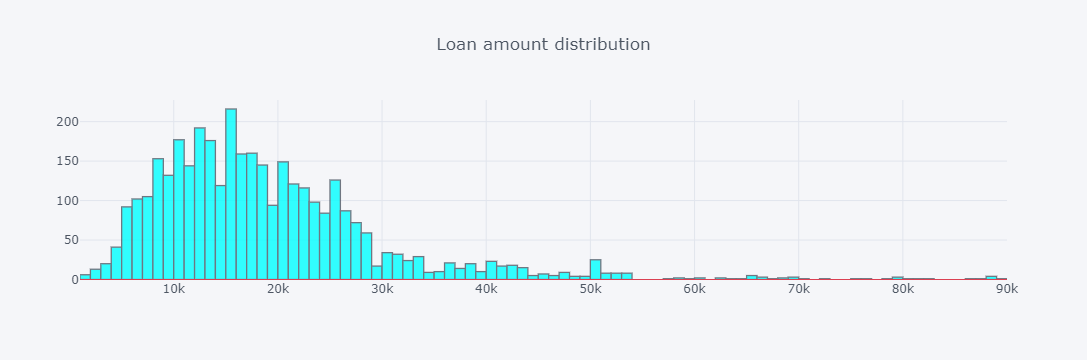

In [10]:
Train.LOAN.iplot(kind='hist', title = 'Loan amount distribution', hline=(0), color = ['cyan'])

We see that Loans have a high variance and the mean is higher than the median,
let's plot the column:

### Target Variable

let's see the distribution of the target column:

In [11]:
Train.BAD.value_counts()/Train.shape[0]*100,2

(0    79.725951
 1    20.274049
 Name: BAD, dtype: float64,
 2)

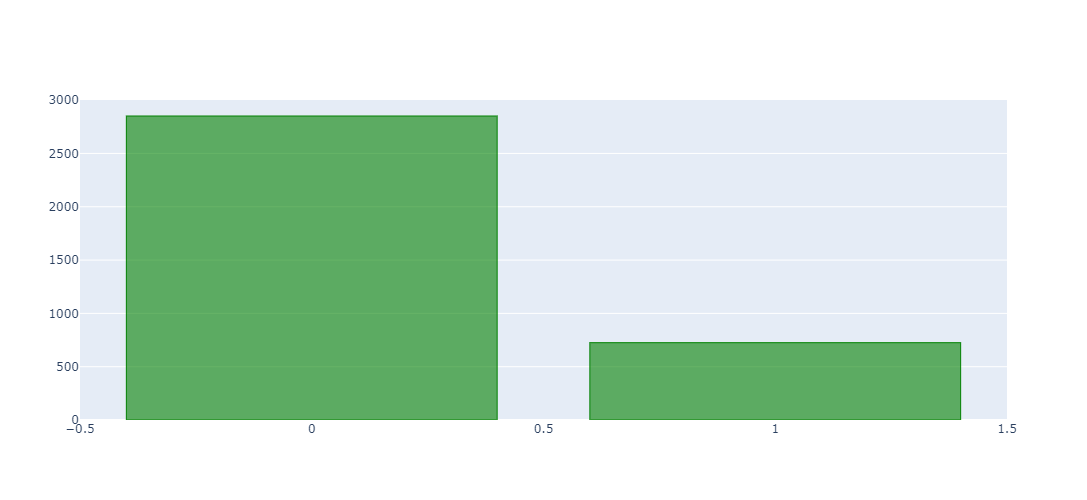

In [12]:
target_layout = cf.Layout(
    height=500,
    width=400
)
Train.BAD.value_counts().iplot(kind='bar',layout = target_layout, title = 'Default Flag distribution', hline=(0),colors=['green'])

### Numeric variables

now we will inspect the other numeric varaibles:

In [13]:
Floats = Train.select_dtypes(include = "float64").columns.tolist() #float variables
Train[Floats].describe()

,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,3247.000000,3501.000000,3263.000000,3158.000000,3231.000000,3388.000000,3264.000000,3440.000000,2834.000000
mean,74258.111001,102090.687672,8.804229,0.256808,0.456825,178.770826,1.176777,21.160465,33.866829
std,45618.946425,59169.611815,7.572938,0.858860,1.158590,86.962320,1.705303,10.059657,8.948633
min,2063.000000,8800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,46622.500000,66271.000000,3.000000,0.000000,0.000000,112.625000,0.000000,15.000000,29.183552
50%,65519.000000,89756.000000,7.000000,0.000000,0.000000,173.041877,1.000000,20.000000,34.785001
75%,92113.500000,120000.000000,13.000000,0.000000,0.000000,230.674868,2.000000,26.000000,38.972366
max,399550.000000,855909.000000,41.000000,10.000000,13.000000,1168.233561,14.000000,71.000000,203.312149


now we will visualize this data:

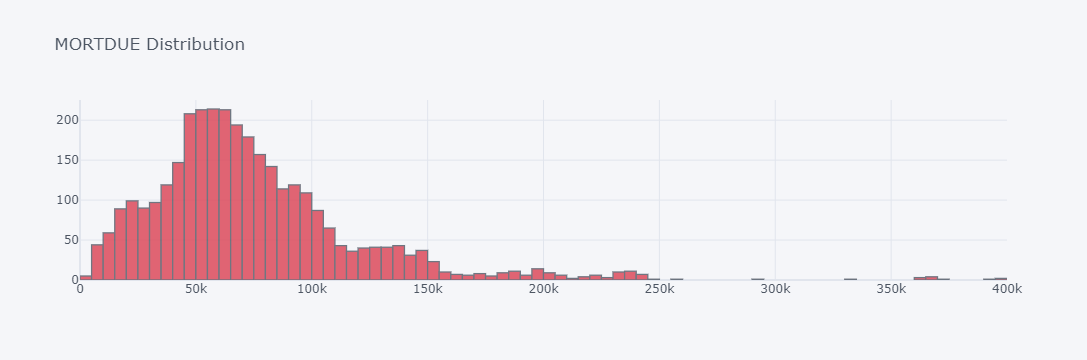

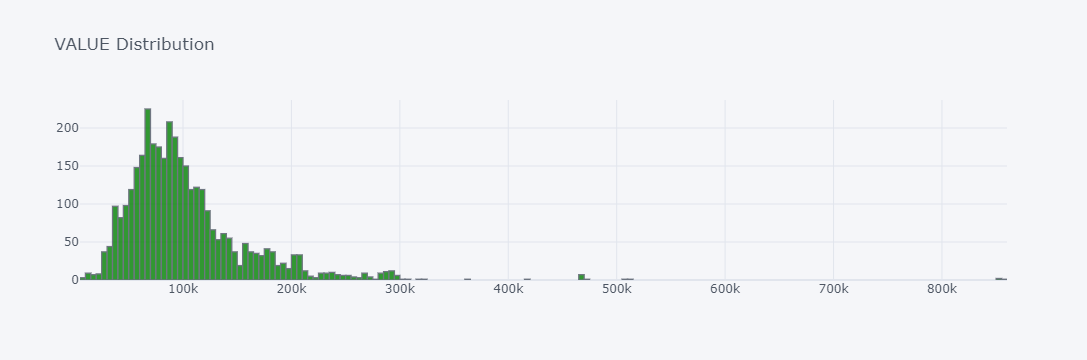

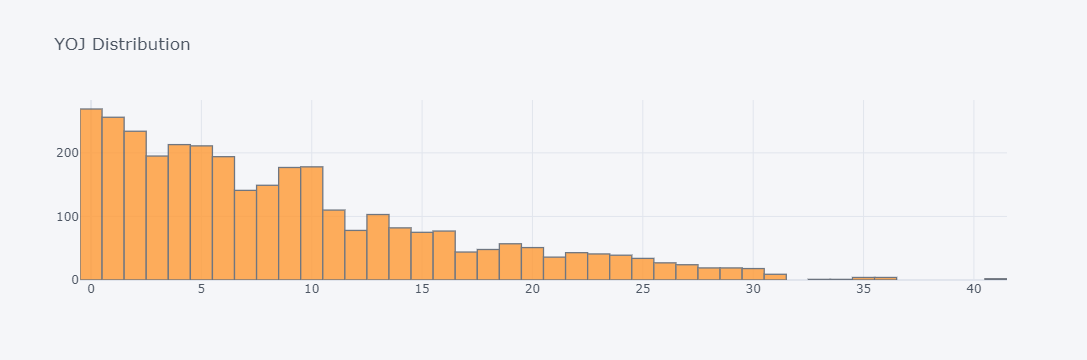

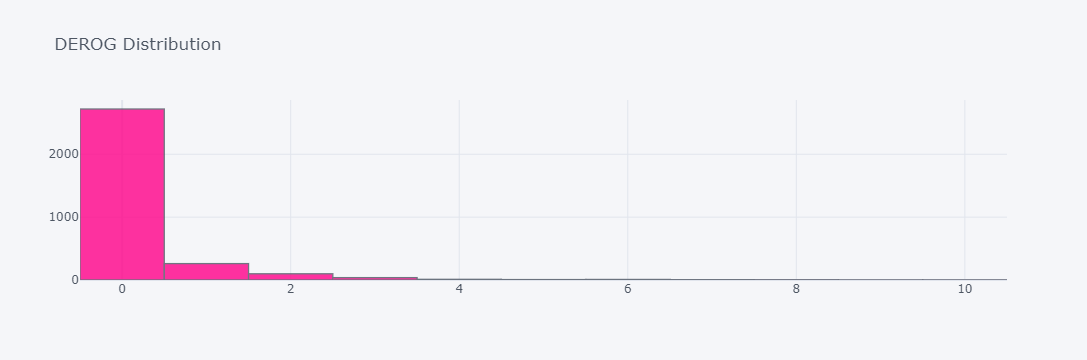

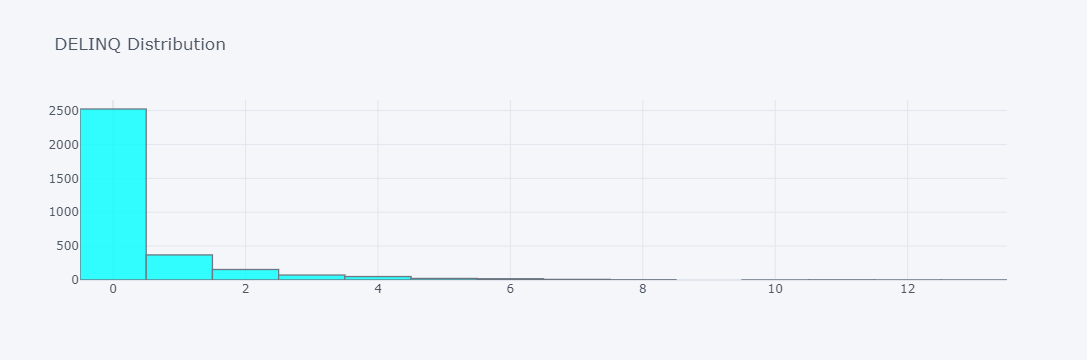

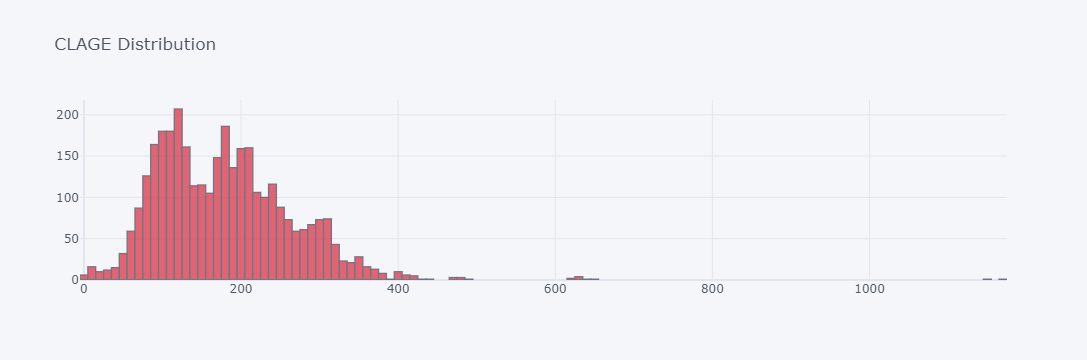

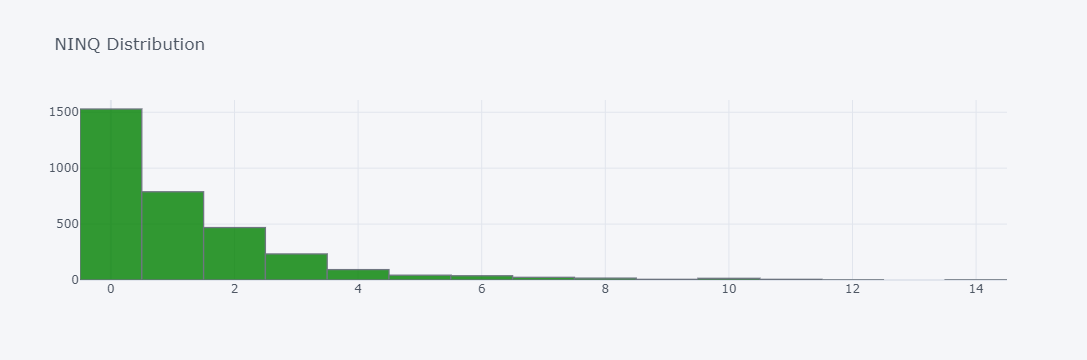

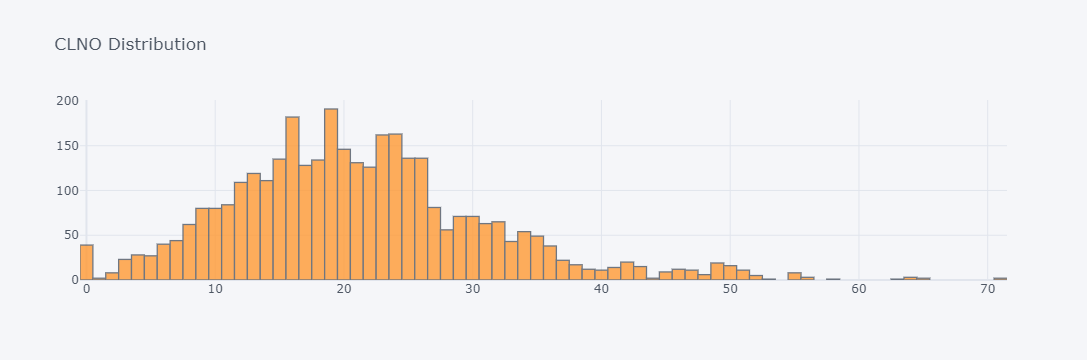

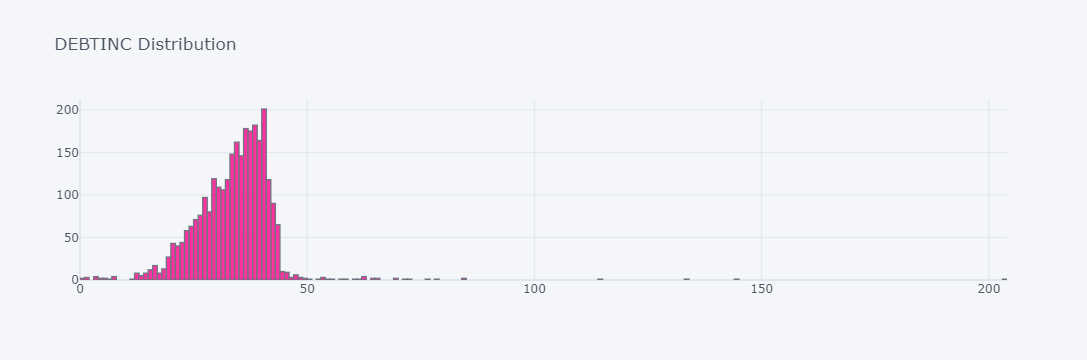

In [15]:
colors = ["red","green","orange","pink","cyan","red","green","orange","pink"]
for color,col in enumerate(Floats):    
    Train[col].iplot(kind='histogram',title = f"{col} Distribution",color = colors[color], filename='histogram-subplots')

### Categoric Variables

now we will inspect categoric variables:

In [24]:
Cats = Train.select_dtypes(include = "object").columns.tolist()[::-1] #float variables
Train[Cats].describe(include = "object")

,JOB,REASON
count,3406,3423
unique,6,2
top,Other,DebtCon
freq,1414,2362


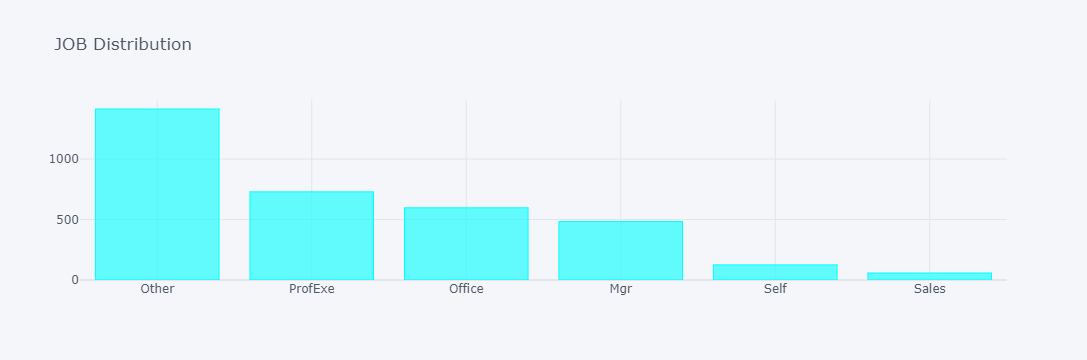

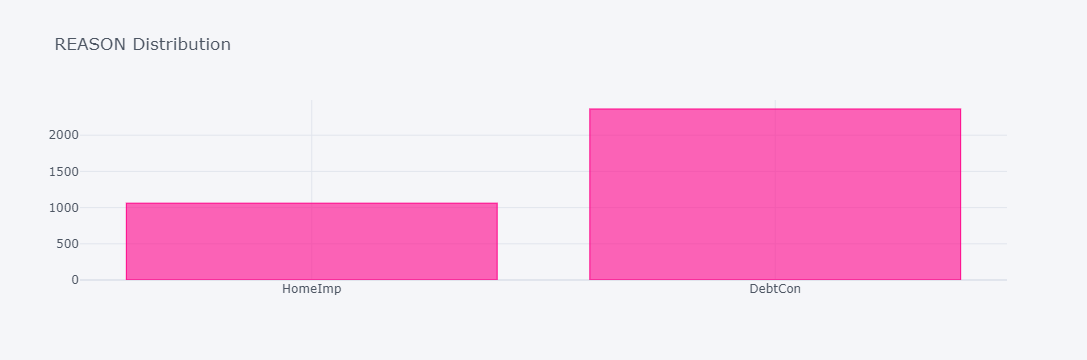

In [27]:
colors = ["cyan","pink"]
for i,col in enumerate(Cats):    
    Train[col].value_counts().sort_values(ascending = bool(i)).iplot(kind='bar',title = f"{col} Distribution",color = colors[i], filename='bar-subplots')